## ROC 曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

E:\lbs\conda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
from playML.metrics import FPR, TPR

fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

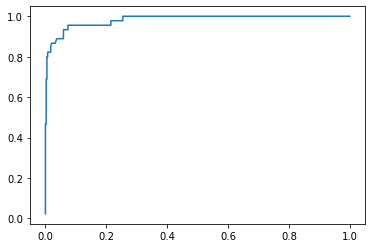

In [6]:
plt.plot(fprs, tprs)
plt.show()

### scikit-learn中的ROC

In [7]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

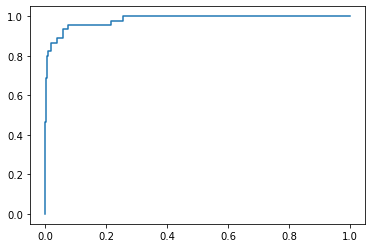

In [8]:
plt.plot(fprs, tprs)
plt.show()

### ROC AUC

In [9]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.9823868312757201